<a href="https://colab.research.google.com/github/ddecosmo-dev/thread-checker/blob/main/threadCheckerApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#@title  fastener Classifier GUI
# ---------------------------------------------------------------------------------
# Section 1: Setup and Imports
# ---------------------------------------------------------------------------------
# Core libraries for machine learning and image processing
import tensorflow as tf
import numpy as np
from PIL import Image
import io
import json

# Libraries for building the interactive GUI in Colab
import ipywidgets as widgets
from ipywidgets import Layout
from google.colab import drive
from IPython.display import display
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

##constants
IMG_HEIGHT = 224
IMG_WIDTH = 224

# ---------------------------------------------------------------------------------
# Section 2: Connect to Google Drive
# ---------------------------------------------------------------------------------
# This will prompt you for authorization to access your Google Drive files.
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

#drive.mount("/content/drive", force_remount=True)

#import data from training
# ---------------------------------------------------------------------------------
# Section 3: Configuration & Model Loading (from JSON)
# ---------------------------------------------------------------------------------
# --- IMPORTANT: UPDATE THESE TWO PATHS ---

# 1. Path to the JSON file containing your class structure map.
CLASS_MAP_PATH = '/content/drive/MyDrive/24-679 AI ML Projects/Project 0/class_map.json'

# 2. Path to your trained model file.
MODEL_PATH = '/content/drive/MyDrive/24-679 AI ML Projects/Project 0/thread_checker_model.keras'
# --- End of Configuration ---

# Load the class map from the JSON file
try:
    with open(CLASS_MAP_PATH, 'r') as f:
        class_map = json.load(f)
    # Create the flat CLASS_NAMES list for the model's output index.
    # It sorts the map by index (0, 1, 2...) and gets the corresponding key.
    CLASS_NAMES = [key for key, value in sorted(class_map.items(), key=lambda item: item[1])]
    print(f"Successfully loaded {len(CLASS_NAMES)} class names from JSON map.")
except FileNotFoundError:
    print(f"ERROR: Class map file not found at {CLASS_MAP_PATH}. Please create it first.")
    CLASS_NAMES = []
except Exception as e:
    print(f"An error occurred while loading the JSON map: {e}")
    CLASS_NAMES = []

# Load the CNN model
model = None
if CLASS_NAMES: # Only proceed if the class map loaded successfully
    try:
        model = tf.keras.models.load_model(MODEL_PATH)
        print(f"✅ Model loaded successfully from {MODEL_PATH}")
    except Exception as e:
        print(f"🚨 ERROR: Could not load the model file at {MODEL_PATH}. {e}")

# --- V E R I F I C A T I O N   S T E P ---
if model and CLASS_NAMES:
    model_output_units = model.output_shape[-1]
    num_loaded_classes = len(CLASS_NAMES)
    if model_output_units == num_loaded_classes:
        print(f"✅ Verification successful: Model and class map are in sync ({num_loaded_classes} classes).")
    else:
        print("❌ CRITICAL ERROR: Model and class map are out of sync!")
        model = None

# ---------------------------------------------------------------------------------
# Section 4: Image Preprocessing Function
# ---------------------------------------------------------------------------------
def preprocess_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    img_array = tf.keras.utils.img_to_array(img)
    img_tensor = np.expand_dims(img_array, axis=0) # Add batch dimension
    return img_tensor

from google.colab import files
from IPython.display import display, clear_output, Image
import io

def upload_test_photo():
    """
    Uses Colab's built-in file uploader to get an image from the user.

    Returns:
        The content of the uploaded image as bytes, or None if no file was uploaded.
    """
    print("Please upload your test photo...")

    # This line PAUSES execution and displays the "Choose Files" button.
    uploaded_files = files.upload()

    # After upload, the code resumes. We check if a file was actually uploaded.
    if not uploaded_files:
        print("No file selected. Please run the cell again to try once more.")
        return None

    # Get the filename and content from the returned dictionary.
    # We assume only one file was uploaded.
    filename = list(uploaded_files.keys())[0]
    file_bytes = uploaded_files[filename]

    # Clear the upload button and message for a cleaner look.
    clear_output()

    print(f"✅ Success! Received file: '{filename}'")
    print("The image content is now ready for the next step.")

    # Display a small preview of the uploaded image.
    #display(Image(data = file_bytes))

    # Return the raw image data (the bytes) so we can use it later.
    return file_bytes

    # Call the function to trigger the upload process.
# The raw image data will be stored in our new variable.
thread_test_photo_bytes = upload_test_photo()



Libraries imported successfully!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!
Successfully loaded 3 class names from JSON map.
✅ Model loaded successfully from /content/drive/MyDrive/24-679 AI ML Projects/Project 0/thread_checker_model.keras
✅ Verification successful: Model and class map are in sync (3 classes).


✅ Success! Received file: 'IMG_20250827_133119954 (7).jpg'
The image content is now ready for the next step.


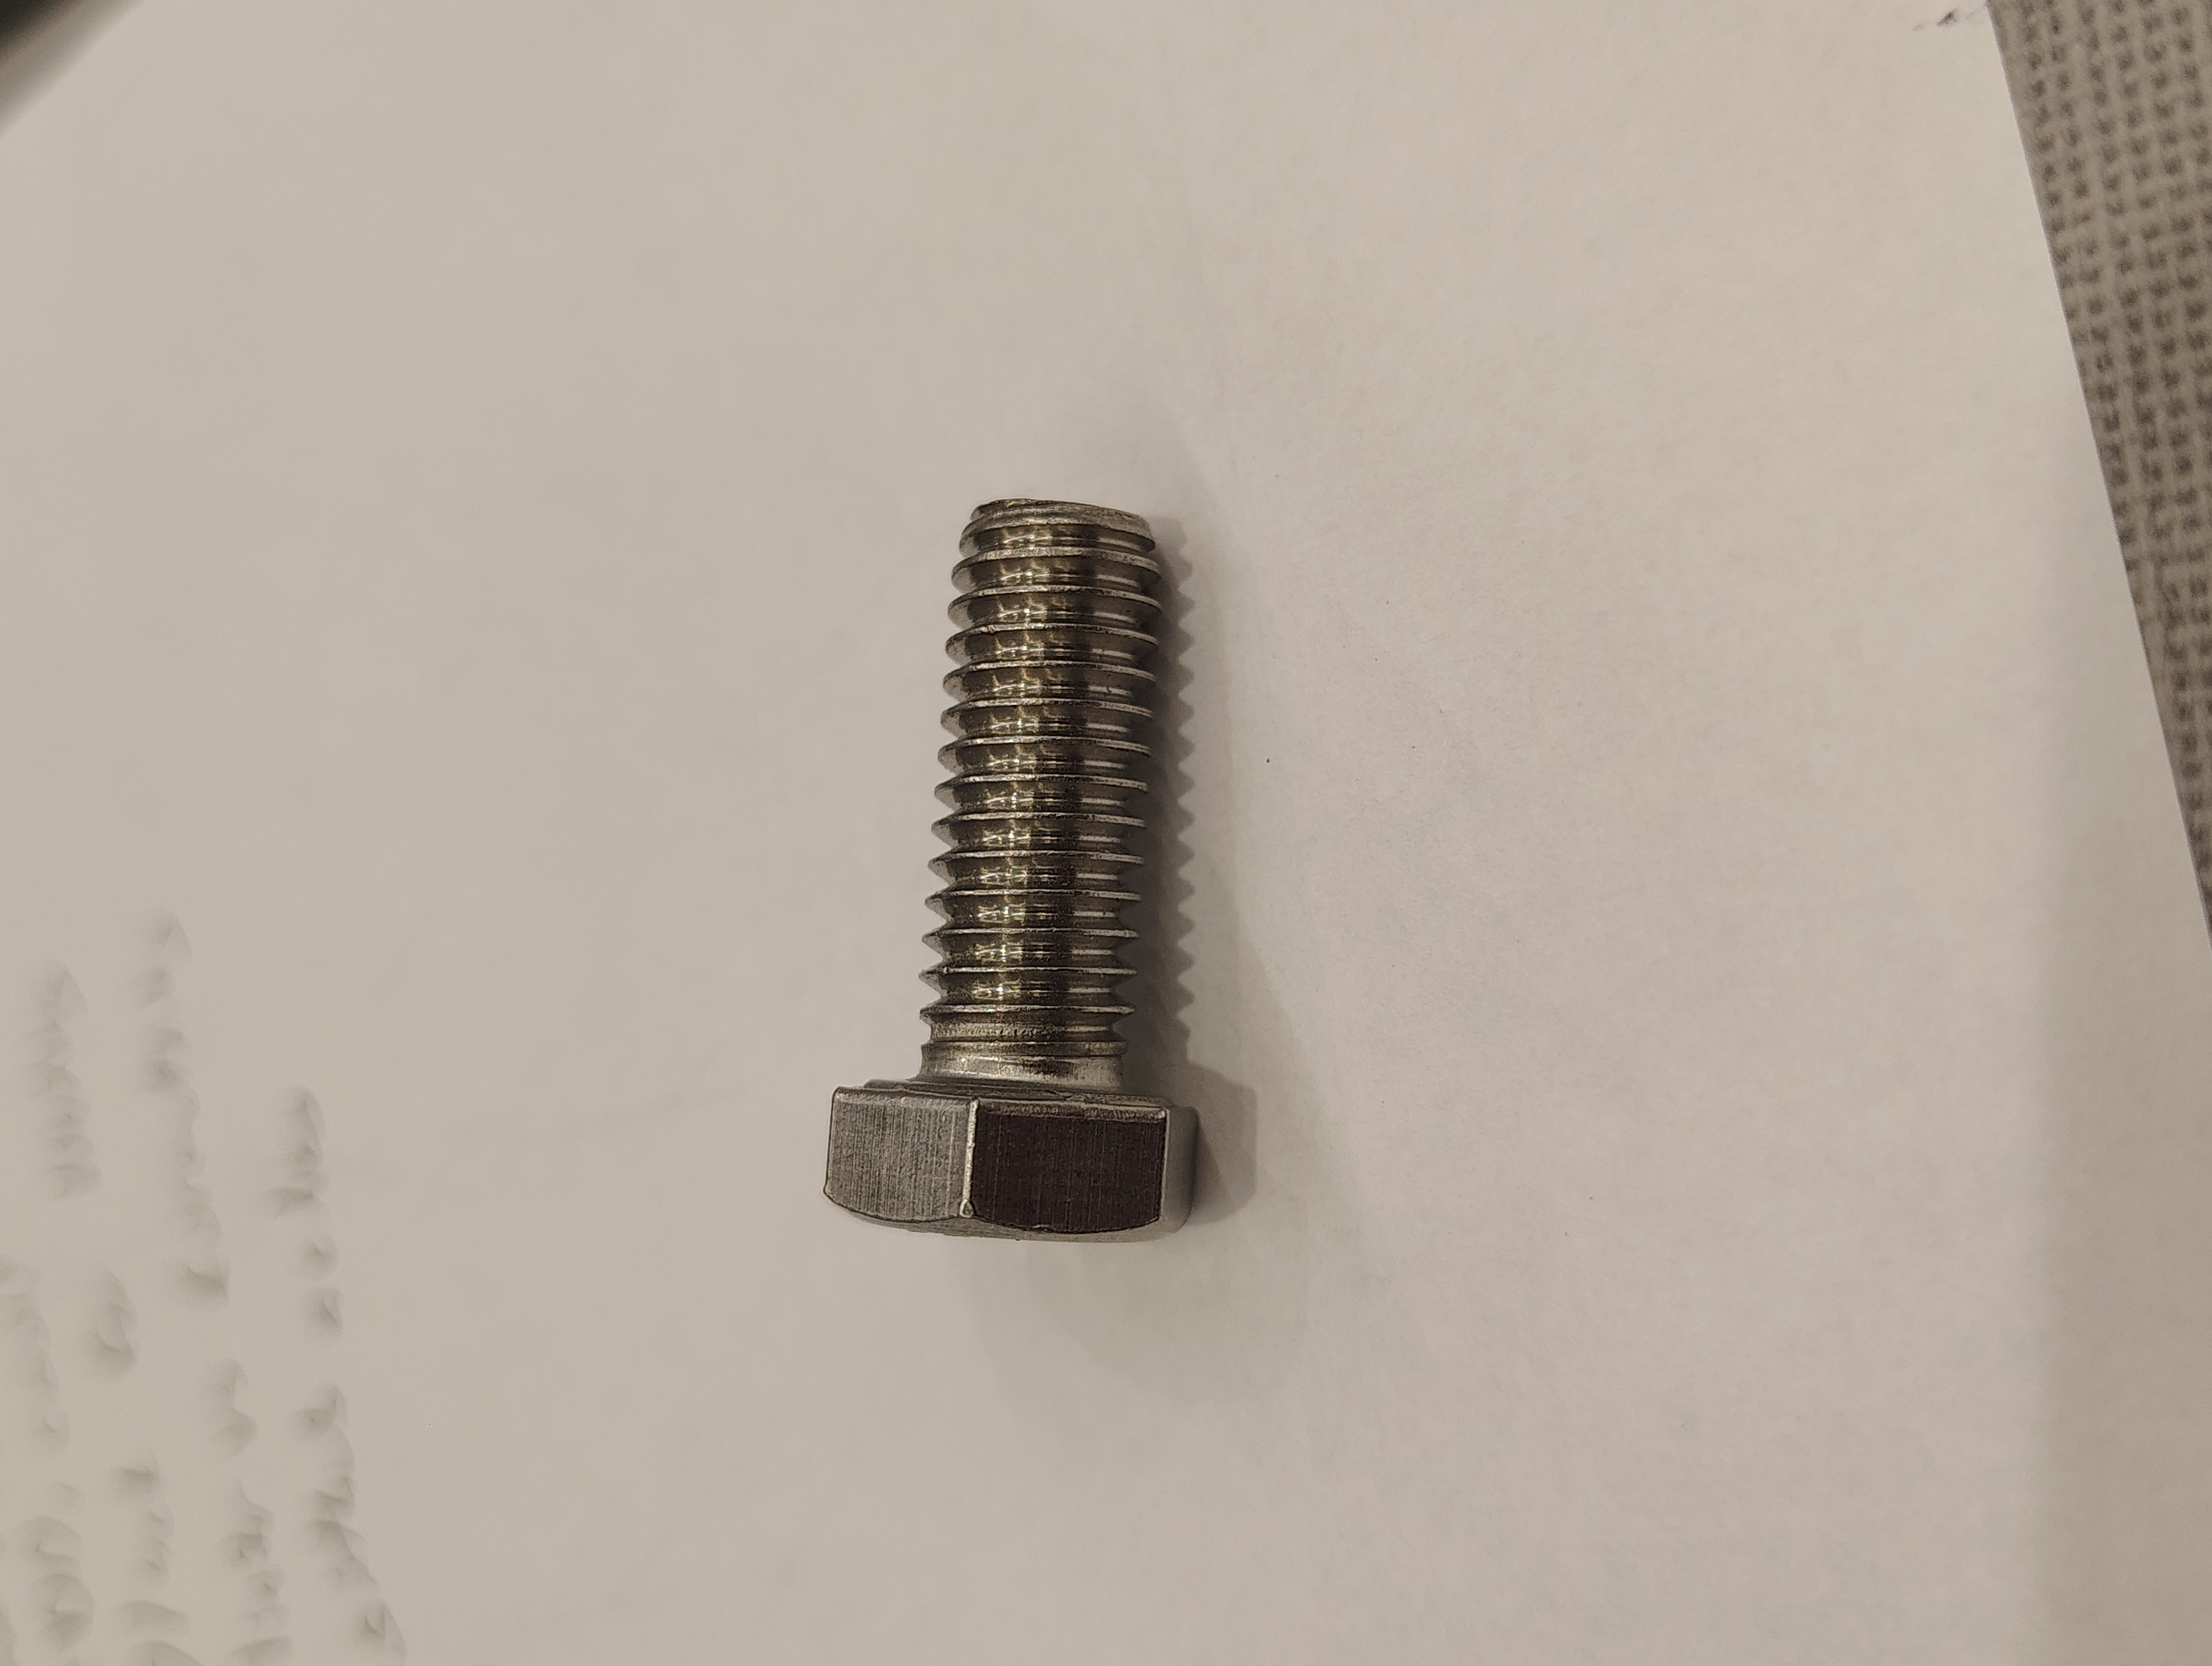

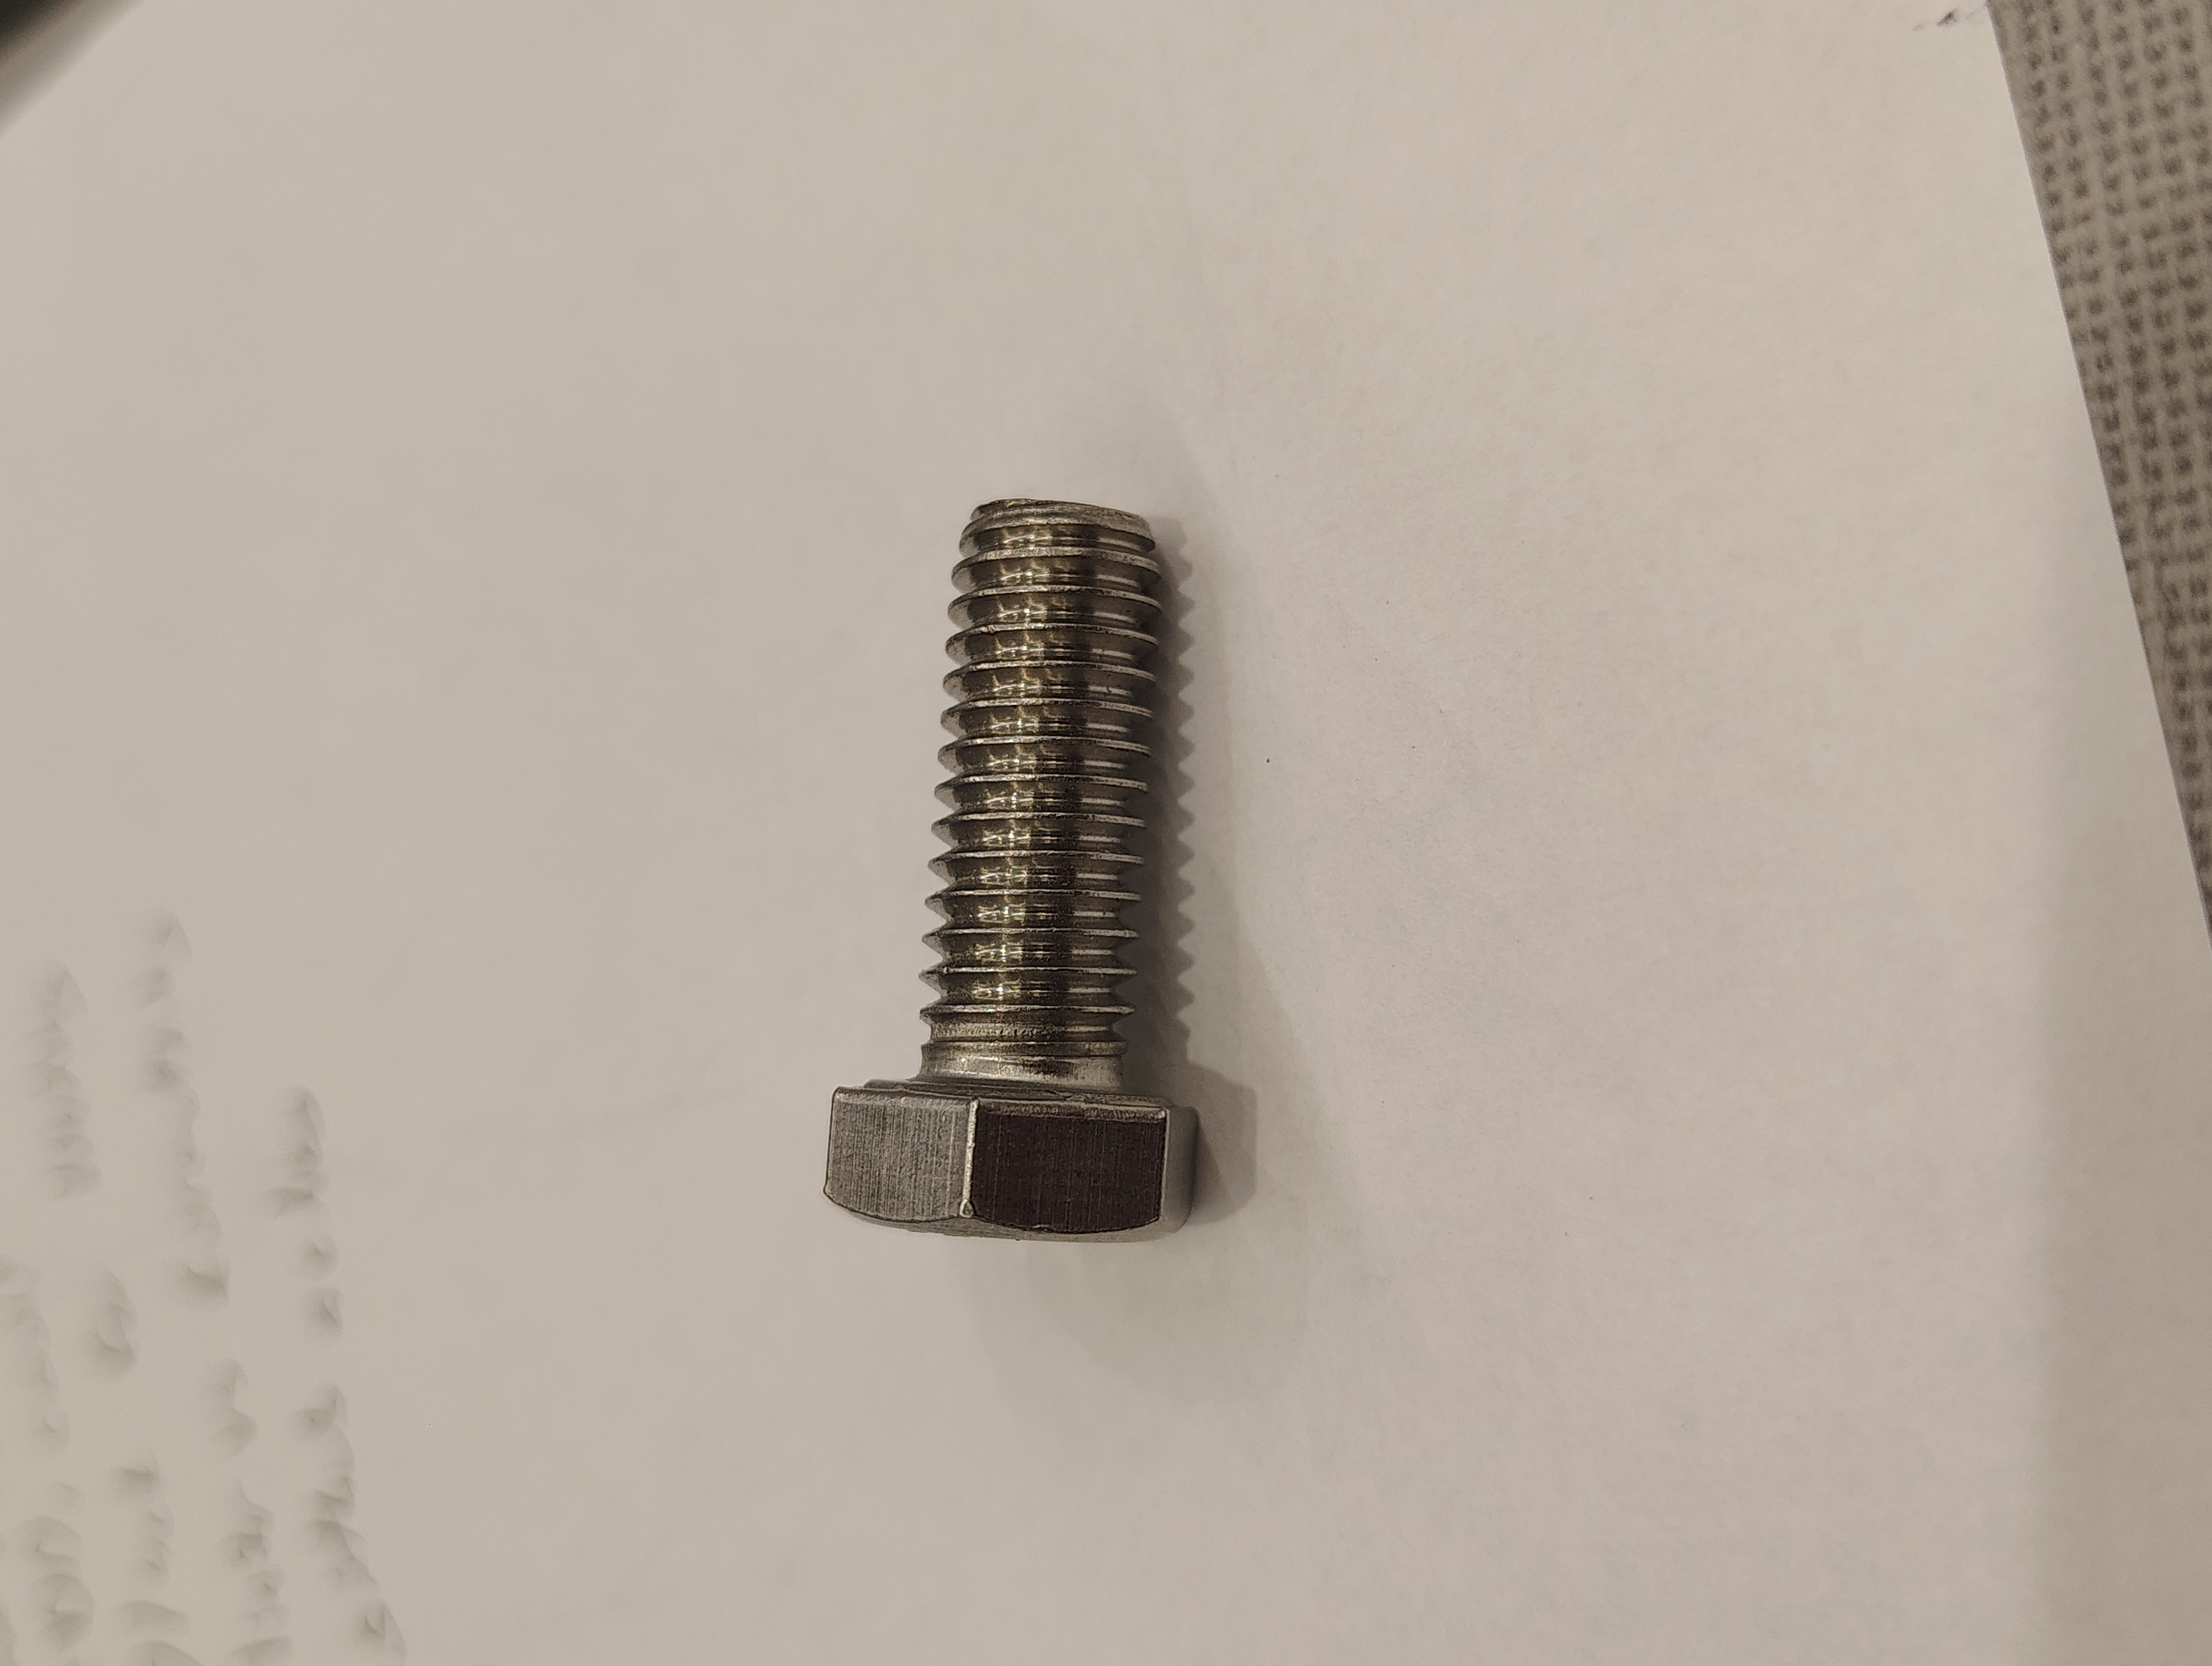

In [67]:
from google.colab import files
from IPython.display import display, clear_output, Image
import io

def upload_test_photo():
    """
    Uses Colab's built-in file uploader to get an image from the user.

    Returns:
        The content of the uploaded image as bytes, or None if no file was uploaded.
    """
    print("Please upload your test photo...")

    # This line PAUSES execution and displays the "Choose Files" button.
    uploaded_files = files.upload()

    # After upload, the code resumes. We check if a file was actually uploaded.
    if not uploaded_files:
        print("No file selected. Please run the cell again to try once more.")
        return None

    # Get the filename and content from the returned dictionary.
    # We assume only one file was uploaded.
    filename = list(uploaded_files.keys())[0]
    file_bytes = uploaded_files[filename]

    # Clear the upload button and message for a cleaner look.
    clear_output()

    print(f"✅ Success! Received file: '{filename}'")
    print("The image content is now ready for the next step.")

    # Display a small preview of the uploaded image.
    #display(Image(data = file_bytes))

    # Return the raw image data (the bytes) so we can use it later.
    return file_bytes

    # Call the function to trigger the upload process.
# The raw image data will be stored in our new variable.
thread_test_photo_bytes = upload_test_photo()